In [39]:
import math
import numpy as np
import sympy
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

In [40]:
d = 0.4 #meters

In [41]:
g = 9.8 #m/s^2
a_max = 2 #m/s^2
v_max = 0.5 #m/s

t = 0
interval = .005

1.05


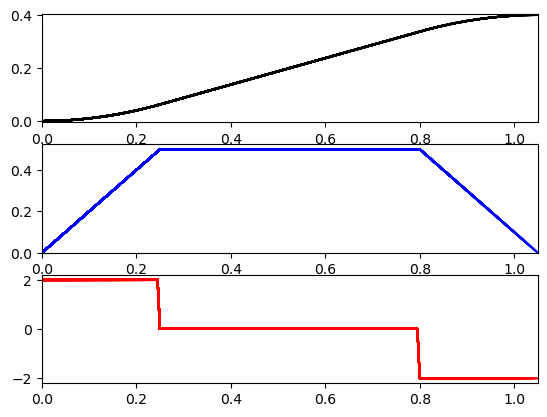

In [42]:
x_accdec = v_max**2/a_max #distance travelled in triangle shape that reaches max v

T_m = 0
T_accel = 0
T_decel = 0
T_const = 0


x = []
y_p = []
y_v = []
y_a = []

fig, axs = plt.subplots(3)
writer = PillowWriter(fps = 25)
with writer.saving(fig,'trap4.gif',100):
    if d <= x_accdec:
        T_accel = math.sqrt(d/a_max)
        T_decel = T_accel
        T_m = T_accel + T_decel
        axs[0].set_xlim(0,T_m)
        axs[0].set_ylim(-.005,d+.005)
        axs[1].set_xlim(0,T_m)
        axs[1].set_ylim(0,v_max+.01)
        axs[2].set_xlim(0,T_m)
        axs[2].set_ylim(-a_max-.1,a_max+.1)
        while(t <= T_m):
            if t <= T_accel:
                y_a.append(a_max)
                y_v.append(a_max*t)
                y_p.append(a_max*t**2/2)
            else:
                t_r = t - T_accel
                v_m = T_accel*a_max
                y_a.append(-a_max)
                y_v.append(v_m - a_max*t_r)
                y_p.append(a_max*T_accel**2/2 + (v_m*t_r - a_max*t_r**2/2))
            x.append(t)
            t += interval
            axs[0].plot(x,y_p,'-k')
            axs[1].plot(x,y_v,'-b')
            axs[2].plot(x,y_a,'-r')
            writer.grab_frame()


    else:
        T_accel = v_max/a_max
        T_decel = T_accel
        T_const = (d - x_accdec)/v_max
        T_m = T_accel + T_decel + T_const
        axs[0].set_xlim(0,T_m)
        axs[0].set_ylim(-.005,d+.005)
        axs[1].set_xlim(0,T_m)
        axs[1].set_ylim(0,v_max+.025)
        axs[2].set_xlim(0,T_m)
        axs[2].set_ylim(-a_max-.2,a_max+.2)
        while(t <= T_m):
            if t <= T_accel:
                y_a.append(a_max)
                y_v.append(a_max*t)
                y_p.append(a_max*t**2/2)
            elif(t < T_accel + T_const):
                y_a.append(0)
                y_v.append(v_max)
                y_p.append(a_max*T_accel**2/2 + v_max*(t - T_accel))
            else:
                t_r = t - T_accel - T_const
                y_r = a_max*T_accel**2/2 + v_max*T_const
                y_a.append(-a_max)
                y_v.append(v_max - a_max*t_r)
                y_p.append(y_r + (v_max*t_r - a_max*t_r**2/2))
            x.append(t)
            t += interval
            axs[0].plot(x,y_p,'-k')
            axs[1].plot(x,y_v,'-b')
            axs[2].plot(x,y_a,'-r')
            writer.grab_frame()
print(T_m)

<img src="trap4.gif" width="400" align="left">